In [92]:
#importing necessary libraries
import numpy as np
import pandas as pd
% matplotlib inline
from matplotlib import pyplot as plt

In [178]:
df = pd.read_csv(r'C:\ML repo\100DaysOfMLCode-master\Logistic_regression\2.txt')
print(f"Number of observations in df:{df.shape}")
df.head()

Number of observations in df:(100, 3)


,Exam 1,Exam 2,cls
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


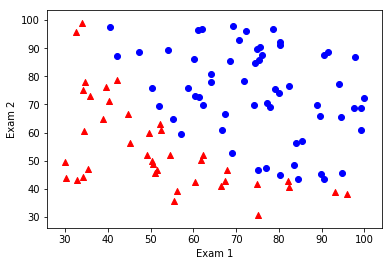

In [201]:
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
for i in range(df.shape[0]):
    if df['cls'][i] == 0:
        plt.scatter(df['Exam 1'][i], df['Exam 2'][i],marker = '^',c = 'r',label = 'Failed' )
    else:
        plt.scatter(df['Exam 1'][i],df['Exam 2'][i], marker = 'o', c = 'b',label = 'Passed')

In [94]:
m = df.shape[0] #get number of observations and create an array. 
x0 = np.ones(m)
x1 = df['Exam 1']
x2 = df['Exam 2']

In [95]:
X = np.array([x0,x1,x2]).T #create array of a combination x0,x1,x2
X.shape

(100, 3)

In [96]:
y = np.array(df['cls'])
y.shape

(100,)

In [179]:
#initial value of theta
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0.])

In [98]:
def sigmoid(Z):
    return (1 / (1 + np.exp(-Z)))

In [99]:
def cost(theta,X,y):
    h = sigmoid(X.dot(theta))
    return ((-y * np.log(h) - (1 - y) * np.log(1 - h)).mean())

In [100]:
def gradient(theta,X,y):    
    theta = np.matrix(theta)
    grad = np.zeros(theta.size)
    X = np.matrix(X)
    y = np.matrix(y)
    error = sigmoid(X * theta.T) - y
    for i in range(theta.size):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad
        

In [101]:
print('Intial Cost', cost(theta,X,y))
init_grad = gradient(theta,X,y)
print('Intial gradient', init_grad)

Intial Cost 0.6931471805599453
Intial gradient [ -10.         -656.44274057 -662.21998088]


In [102]:
def gradient_descent(X,y):
    theta=np.zeros(X.shape[1])
    num_iter=100000
    cost_hist=np.zeros(num_iter)
    alpha=0.001
    for i in range(num_iter):
        z = np.dot(X,theta)
        h = sigmoid(z)
        gr = np.dot(X.T, (h - y)) / y.size
        theta -= alpha * gr
        cost_hist[i]=cost(theta,X,y)
    return theta,cost_hist

In [103]:
fnal,hist=gradient_descent(X,y)
print("the final parameters are ",fnal)

the final parameters are  [-4.81180027  0.04528064  0.03819149]


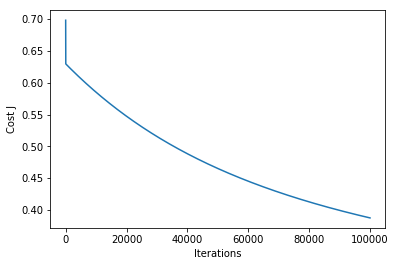

In [112]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(hist);
plt.ylabel('Cost J');
plt.xlabel('Iterations');